In [ ]:
# Objectif Général
#  — L’objectif de ce TP est de vous guider à travers toutes les étapes de la construction
#  d’un modèle de Machine Learning, de la collecte des données à l’évaluation finale.
#  — Nousutiliserons le jeu de données California Housing, qui contient des informations
#  agrégées sur des blocs de recensement en Californie et dont la variable cible est le prix
#  médian des maisons (en centaines de milliers de dollars). Il s’agit d’un problème de
#  régression.

In [1]:
# Chargement et description initiale

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [2]:
# 1 Phase I : Processing, Wrangling & Visualizing Data
#  1.1 Data Collection et Description
#  — Tâche 1.1 : Chargez le jeu de données California Housing en utilisant scikit-learn.
#  Créez un DataFrame Pandas pour faciliter la manipulation et incluez la variable cible
#  (MedHouseVal).

In [3]:
 # Charger les données

housing = fetch_california_housing(as_frame = True)
df = housing.frame
df.rename(columns={'MedHouseVal' : 'Target'}, inplace=True)

In [4]:
print("Description du DataFrame")
print(df.info())

Description du DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [5]:
print("\n Premieres lignes:")
print(df.head())


 Premieres lignes:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [6]:
# Tâche 1.2 : Affichez les statistiques descriptives de base (describe()). Identifiez les
# valeurs manquantes (s’il y en a) et proposez un plan pour les gérer.

print("\n Statistiques descriptives de base")
print(df.describe())


 Statistiques descriptives de base
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.15395

In [7]:
# Tâche 1.3 : Séparez les caractéristiques (X) de la variable cible (y).

X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df.Target

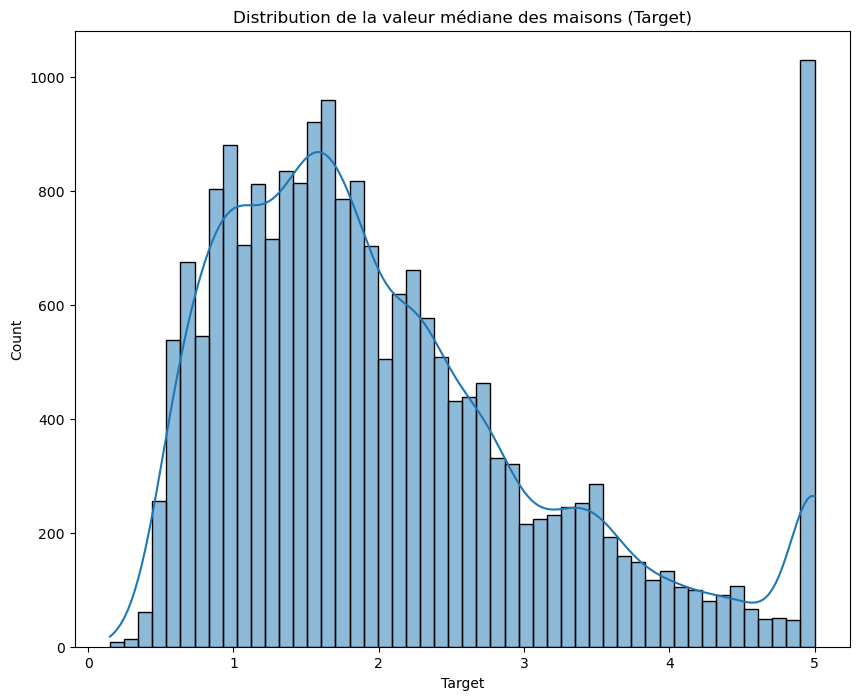

In [8]:
# Tâche 1.4 & 1.5: Visualisation

# Tâche 1.4 : Visualisez la distribution de la variable cible (Target) à l’aide d’un
# histogramme. Commentez sa forme (symétrique, biaisée, etc.).

plt.figure(figsize=(10, 8))
sns.histplot(df['Target'], bins=50, kde=True)
plt.title('Distribution de la valeur médiane des maisons (Target)')
plt.show()

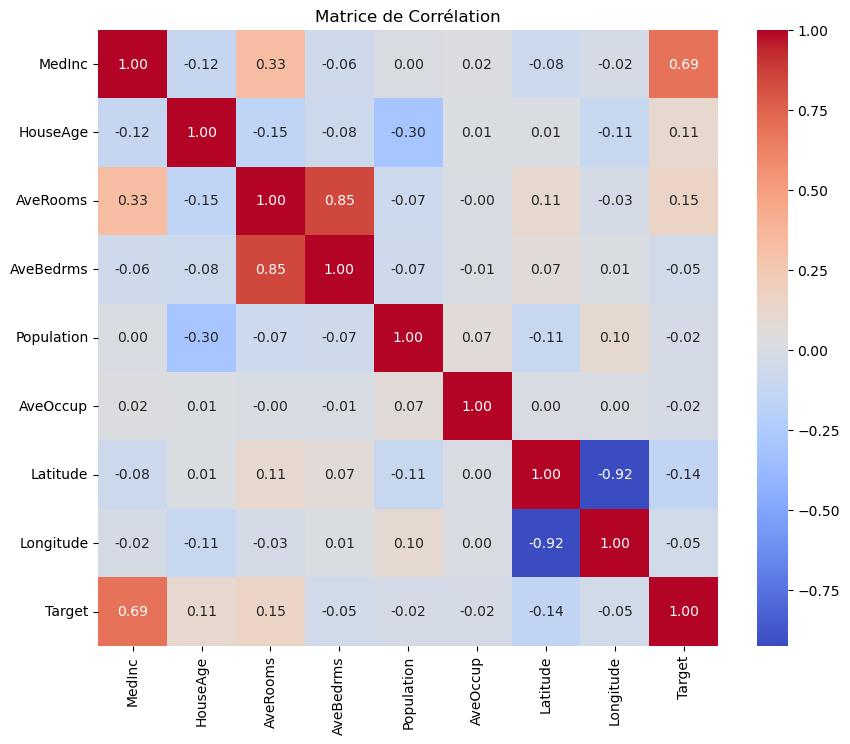

In [9]:
# Tâche 1.5 : Affichez la matrice de corrélation pour visualiser les relations linéaires
# entre les caractéristiques et avec la cible. Quel est l’impact de MedInc (Revenu Médian)
# sur Target?

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

In [10]:
# 2 Phase II : Feature Engineering and Selection
#  2.1 Feature Extraction and Engineering
#  — Tâche 2.1 : Le jeu de données fournit des totaux (pièces, chambres, population) par
#  bloc. Créez les trois nouvelles caractéristiques dérivées suivantes (ratios par foyer) pour
#  capturer des informations plus pertinentes :
#  1. RoomsPerHousehold
#  2. BedroomsPerRoom
#  3. PopulationPerHousehold

In [11]:
# 2.1: Feature Engineering

X = df.drop('Target', axis=1)
y = df['Target']
X['RoomsPerHousehold'] = X['AveRooms'] / X['AveOccup']
X['BedroomsPerRoom'] = X['AveBedrms'] / X['AveRooms']
X['PopulationPerHousehold'] = X['Population'] / X['AveOccup']

In [33]:
print("\n X: \n", X)


 X: 
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  RoomsPerHouseh

In [34]:
#Séparation des données
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Tâche 2.2 : Étant donné que les caractéristiques ont des échelles très différentes, appliquez
#  une normalisation (StandardScaler) aux ensembles d’entraînement et de test.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print("\nÉchelle des données après standardisation (premières lignes):")
print(X_train_scaled.head())


Échelle des données après standardisation (premières lignes):
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0 -0.326196  0.348490 -0.174916  -0.208365    0.768276  0.051376 -1.372811   
1 -0.035843  1.618118 -0.402835  -0.128530   -0.098901 -0.117362 -0.876696   
2  0.144701 -1.952710  0.088216  -0.257538   -0.449818 -0.032280 -0.460146   
3 -1.017864  0.586545 -0.600015  -0.145156   -0.007434  0.077507 -1.382172   
4 -0.171488  1.142008  0.349007   0.086624   -0.485877 -0.068832  0.532084   

   Longitude  RoomsPerHousehold  BedroomsPerRoom  PopulationPerHousehold  
0   1.272587          -0.552017        -0.211785                0.322906  
1   0.709162           0.526956         0.342185                0.672027  
2  -0.447603           0.082291        -0.661658               -0.430461  
3   1.232698          -0.869143         0.783032               -0.380587  
4  -0.108551           0.661600        -0.550364               -0.314962  


In [ ]:
# fit_transform() calcule la moyenne et l’écart-type sur l’ensemble d’entraînement, puis applique la normalisation.
# transform() applique les mêmes paramètres sur le test.

# Il est crucial d'appliquer fit_transform() uniquement sur l'ensemble d'entrainement pour eviter que le modele n'ai access au donnees de test avant la prediction.

In [41]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train_scaled, y_train)

# Importance de caracteristiques
importances = forest.feature_importances_
indices = np.argsort(importances)[:: -1]

# Affichage des 5 plus importantes
top5_features = X_train.columns[indices[:5]]
print("Top 5 des caracteristiques des plus importantes: ")
for feature, importance in zip(top5_features, importances[indices[:5]]):
    print(f"{feature}: {importance: .4f}")

Top 5 des caracteristiques des plus importantes: 
MedInc:  0.5211
AveOccup:  0.1268
Latitude:  0.0828
Longitude:  0.0828
HouseAge:  0.0518


In [ ]:
 # 3 Phase III : Building, Tuning Deploying Models
 # 3.1 Model Building
 # — Tâche 3.1 : Entraînez un modèle de Régression Linéaire (LinearRegression) et
 # un modèle de Forêt Aléatoire (RandomForestRegressor) en utilisant les données
 # normalisées.
 # — Tâche3.2:Expliquezbrièvement les avantages théoriques de l’utilisation d’un modèle
 # non-linéaire (Random Forest) par rapport à un modèle linéaire (Régression Linéaire)
 # dans ce contexte.

In [16]:
# 3.1: Entraînement des modèles
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [17]:
# Régression Linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
# Forêt Aléatoire (hyperparamètres de base)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
forest_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [19]:
 print("\nModèles entraînés.")


Modèles entraînés.


In [ ]:
# 3.2: Explication

# Contrairement à la régression linéaire, qui suppose une relation linéaire entre les variables et la cible, le modèle de Random Forest est capable de capturer des relations complexes et non linéaires.
# Dans le contexte du jeu de données California Housing, cela permet de mieux modéliser la relation entre le prix des maisons et les variables socio-économiques (revenu médian, densité, etc.), qui ne sont pas forcément linéaires.
# Ainsi, la Random Forest obtient généralement de meilleures performances prédictives que la régression linéaire.

In [ ]:
 # 3.2 Model Evaluation
 # — Tâche3.3:Évaluezlesdeuxmodèlessurl’ensemble de test (X_test_scaled, y_test)
 # en utilisant les métriques suivantes (plus les faibles valeurs sont bonnes) :
# 1. Mean Squared Error (MSE)
#  2. Root Mean Squared Error (RMSE)

In [20]:
# Évaluation des modèles
from sklearn.metrics import mean_squared_error

In [21]:
# Prédictions
y_pred_lin = lin_reg.predict(X_test_scaled)
y_pred_forest = forest_reg.predict(X_test_scaled)

In [22]:
# Évaluation Régression Linéaire
mse_lin = mean_squared_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)

In [23]:
# Évaluation Forêt Aléatoire
mse_forest = mean_squared_error(y_test, y_pred_forest)
rmse_forest = np.sqrt(mse_forest)

In [24]:
print(f"\n[Régression Linéaire] RMSE: {rmse_lin:.4f}")
print(f"[Forêt Aléatoire] RMSE: {rmse_forest:.4f}")


[Régression Linéaire] RMSE: 0.6738
[Forêt Aléatoire] RMSE: 0.5060


In [25]:
print(f"\n[Régression Linéaire] MSE: {mse_lin:.4f}")
print(f"[Forêt Aléatoire] MSE: {mse_forest:.4f}")


[Régression Linéaire] MSE: 0.4540
[Forêt Aléatoire] MSE: 0.2561


In [ ]:
# 3.4 Model Deployment (Simulé)
#  — Tâche 3.5 : En supposant que le modèle Random Forest soit le meilleur, utilisez la
#  bibliothèque joblib pour sauvegarder le modèle entraîné sur le disque. C’est l’étape
#  de déploiement de base qui permet de réutiliser le modèle sans le ré-entraîner.

In [26]:
# 3.5: Sauvegarde/Déploiement du modèle
import joblib

In [27]:
# Sauvegarder le meilleur modèle (ici, le Random Forest)
joblib.dump(forest_reg, 'random_forest_regressor.pkl')

['random_forest_regressor.pkl']

In [28]:
print("\nModèle ’random_forest_regressor.pkl’ sauvegardé.")


Modèle ’random_forest_regressor.pkl’ sauvegardé.


In [29]:
# Test de chargement
loaded_model = joblib.load('random_forest_regressor.pkl')
print(f"Modèle chargé. Test de prédiction sur le premier élément du test: {loaded_model.predict(X_test_scaled.iloc[[0]])[0]:.4f}")

Modèle chargé. Test de prédiction sur le premier élément du test: 0.4775


In [42]:
# Tâche 4.1 — Synthèse du pipeline ML
# 🔹 Exemple de paragraphe :

# Dans ce TP, nous avons construit un pipeline complet de Machine Learning appliqué au jeu de données California Housing. 
# Après avoir chargé et exploré les données, nous avons créé de nouvelles caractéristiques dérivées, 
# puis appliqué une normalisation pour mettre toutes les variables sur une même échelle.
# Nous avons ensuite entraîné deux modèles : une régression linéaire et une forêt aléatoire. 
# L’évaluation à l’aide du RMSE a montré que le modèle de forêt aléatoire obtenait de meilleures performances, 
# confirmant l’intérêt des modèles non linéaires pour capturer la complexité des relations entre variables.

In [ ]:
# Tâche 4.2 — Stratégies d’amélioration
# 🔹 Idées concrètes :

# Optimisation des hyperparamètres
# Utiliser GridSearchCV ou RandomizedSearchCV pour tester différentes valeurs de :

# n_estimators

# max_depth

# min_samples_split, etc.

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Meilleurs paramètres :", grid_search.best_params_)


Meilleurs paramètres : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [46]:
joblib.dump(grid_search, 'random_forest_grid_search.pkl')

['random_forest_grid_search.pkl']

In [ ]:
# Autres modèles avancés

# Gradient Boosting (GradientBoostingRegressor)

# XGBoost ou LightGBM

# Gestion des outliers
# Détection par IQR ou Z-score, puis suppression ou traitement.

# Sélection automatique de variables
# Utiliser SelectFromModel ou RFE pour ne garder que les variables les plus influentes.